In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltfrom 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns=999

In [53]:
df = pd.read_csv(r"C:/Users/ABRAHAM/Desktop/Datasets/bike_train.csv")

In [54]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,01-01-2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
4,5,01-01-2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2


In [55]:
#statistical info
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,11634.00000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000
mean,5817.50000,2.497679,0.502665,6.524067,11.517879,0.029654,3.014784,0.681279,1.419804,0.497762,0.476530,0.627135,0.189897,190.082173
std,3358.59085,1.105554,0.500014,3.435818,6.913800,0.169639,2.008181,0.466001,0.636552,0.193030,0.172246,0.192932,0.122169,182.270379
min,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2909.25000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,5817.50000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,8725.75000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,11634.00000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.980000,0.984800,1.000000,0.850700,976.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11634 entries, 0 to 11633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     11634 non-null  int64  
 1   dteday      11634 non-null  object 
 2   season      11634 non-null  int64  
 3   yr          11634 non-null  int64  
 4   mnth        11634 non-null  int64  
 5   hr          11634 non-null  int64  
 6   holiday     11634 non-null  int64  
 7   weekday     11634 non-null  int64  
 8   workingday  11634 non-null  int64  
 9   weathersit  11634 non-null  int64  
 10  temp        11634 non-null  float64
 11  atemp       11634 non-null  float64
 12  hum         11634 non-null  float64
 13  windspeed   11634 non-null  float64
 14  cnt         11634 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 1.3+ MB


In [57]:
#unique values
df.apply(lambda x:len(x.unique()))

instant       11634
dteday          730
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             49
atemp            64
hum              88
windspeed        29
cnt             828
dtype: int64

# Preprocessing dataset

In [58]:
#checking null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [59]:
df["dteday"] = pd.to_datetime(df["dteday"])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11634 entries, 0 to 11633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11634 non-null  int64         
 1   dteday      11634 non-null  datetime64[ns]
 2   season      11634 non-null  int64         
 3   yr          11634 non-null  int64         
 4   mnth        11634 non-null  int64         
 5   hr          11634 non-null  int64         
 6   holiday     11634 non-null  int64         
 7   weekday     11634 non-null  int64         
 8   workingday  11634 non-null  int64         
 9   weathersit  11634 non-null  int64         
 10  temp        11634 non-null  float64       
 11  atemp       11634 non-null  float64       
 12  hum         11634 non-null  float64       
 13  windspeed   11634 non-null  float64       
 14  cnt         11634 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 1.3 MB


In [61]:
# As year and month columns are already avaliable dropping dteday and instant column

df = df.drop("dteday",axis=1)
df=df.drop("instant",axis=1)

In [62]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Expolaratory data analysis

<AxesSubplot:>

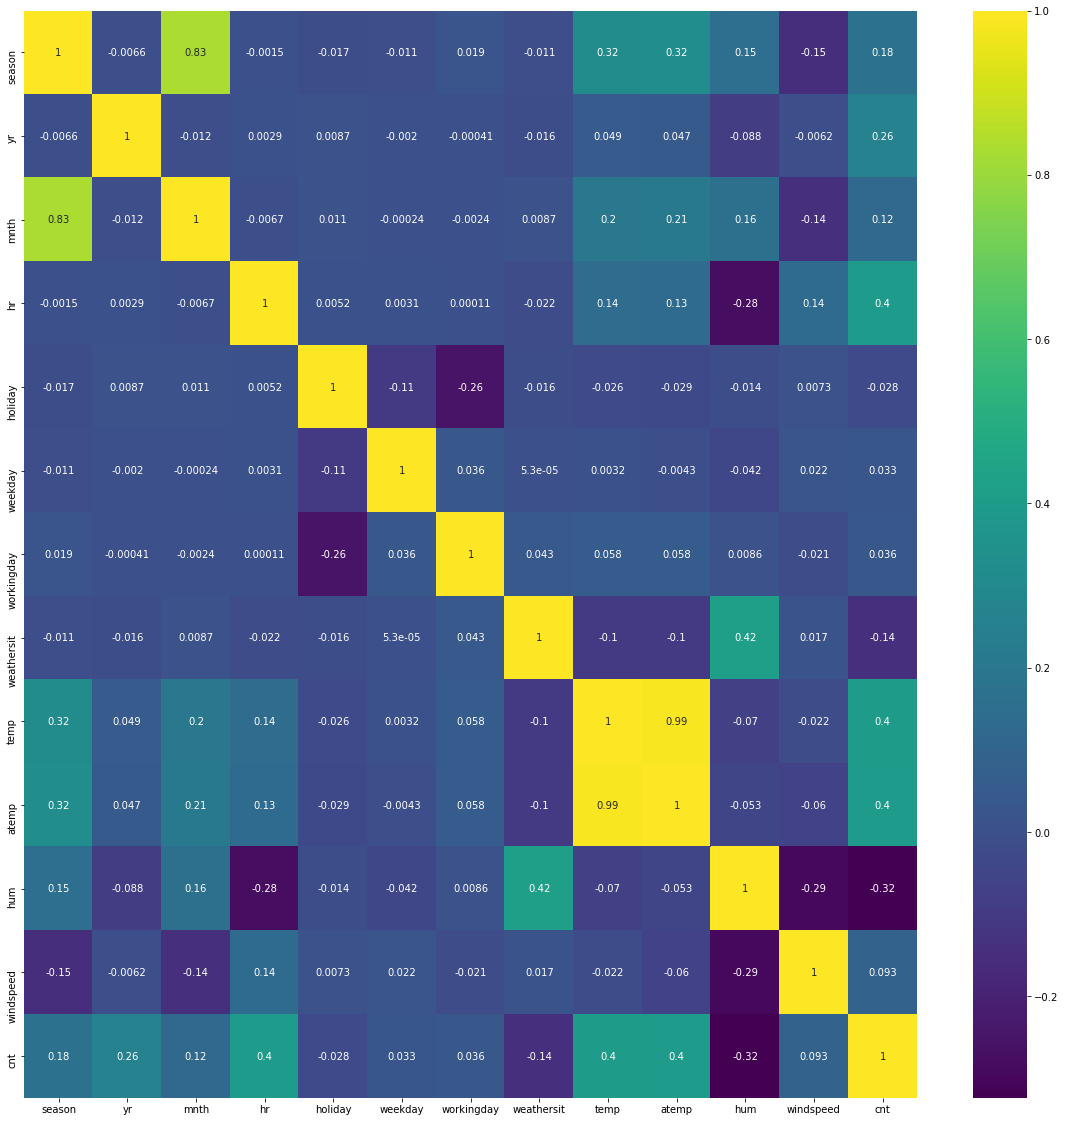

In [63]:
correlation = df.corr()
plt.figure(figsize =(20,20))
sns.heatmap(correlation,xticklabels=df.columns,yticklabels = df.columns,annot=True,cmap="viridis")

{'whiskers': [<matplotlib.lines.Line2D at 0x22f227016d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f22701d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f22701370>],
 'medians': [<matplotlib.lines.Line2D at 0x22f22709490>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f227097f0>],
 'means': []}

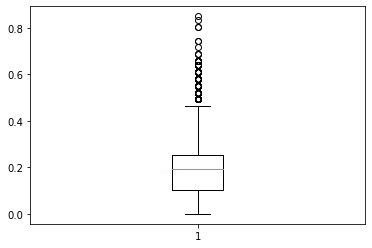

In [64]:
plt.boxplot(df["windspeed"])

In [65]:
Q1 = df["windspeed"].quantile(0.25)

Q3 = df["windspeed"].quantile(0.75)

Q1,Q3

(0.1045, 0.2537)

In [66]:
IQR = Q3-Q1
IQR

0.1492

In [67]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(-0.1193, 0.4775)

In [68]:
#checking for outliers

df[(df["windspeed"]<lower_limit)|(df["windspeed"]>upper_limit)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
120,1,0,1,14,0,6,0,1,0.20,0.1667,0.32,0.4925,95
123,1,0,1,17,0,6,0,1,0.16,0.1212,0.37,0.5522,69
174,1,0,1,12,0,3,1,1,0.20,0.1515,0.47,0.5821,55
179,1,0,1,18,0,3,1,1,0.20,0.1515,0.47,0.5224,137
313,1,0,1,13,0,5,1,1,0.20,0.1515,0.21,0.5821,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11564,1,1,12,6,0,4,1,1,0.24,0.1970,0.70,0.4925,45
11566,1,1,12,9,0,4,1,1,0.26,0.2121,0.60,0.4925,133
11567,1,1,12,10,0,4,1,1,0.28,0.2273,0.56,0.5224,75
11601,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,66


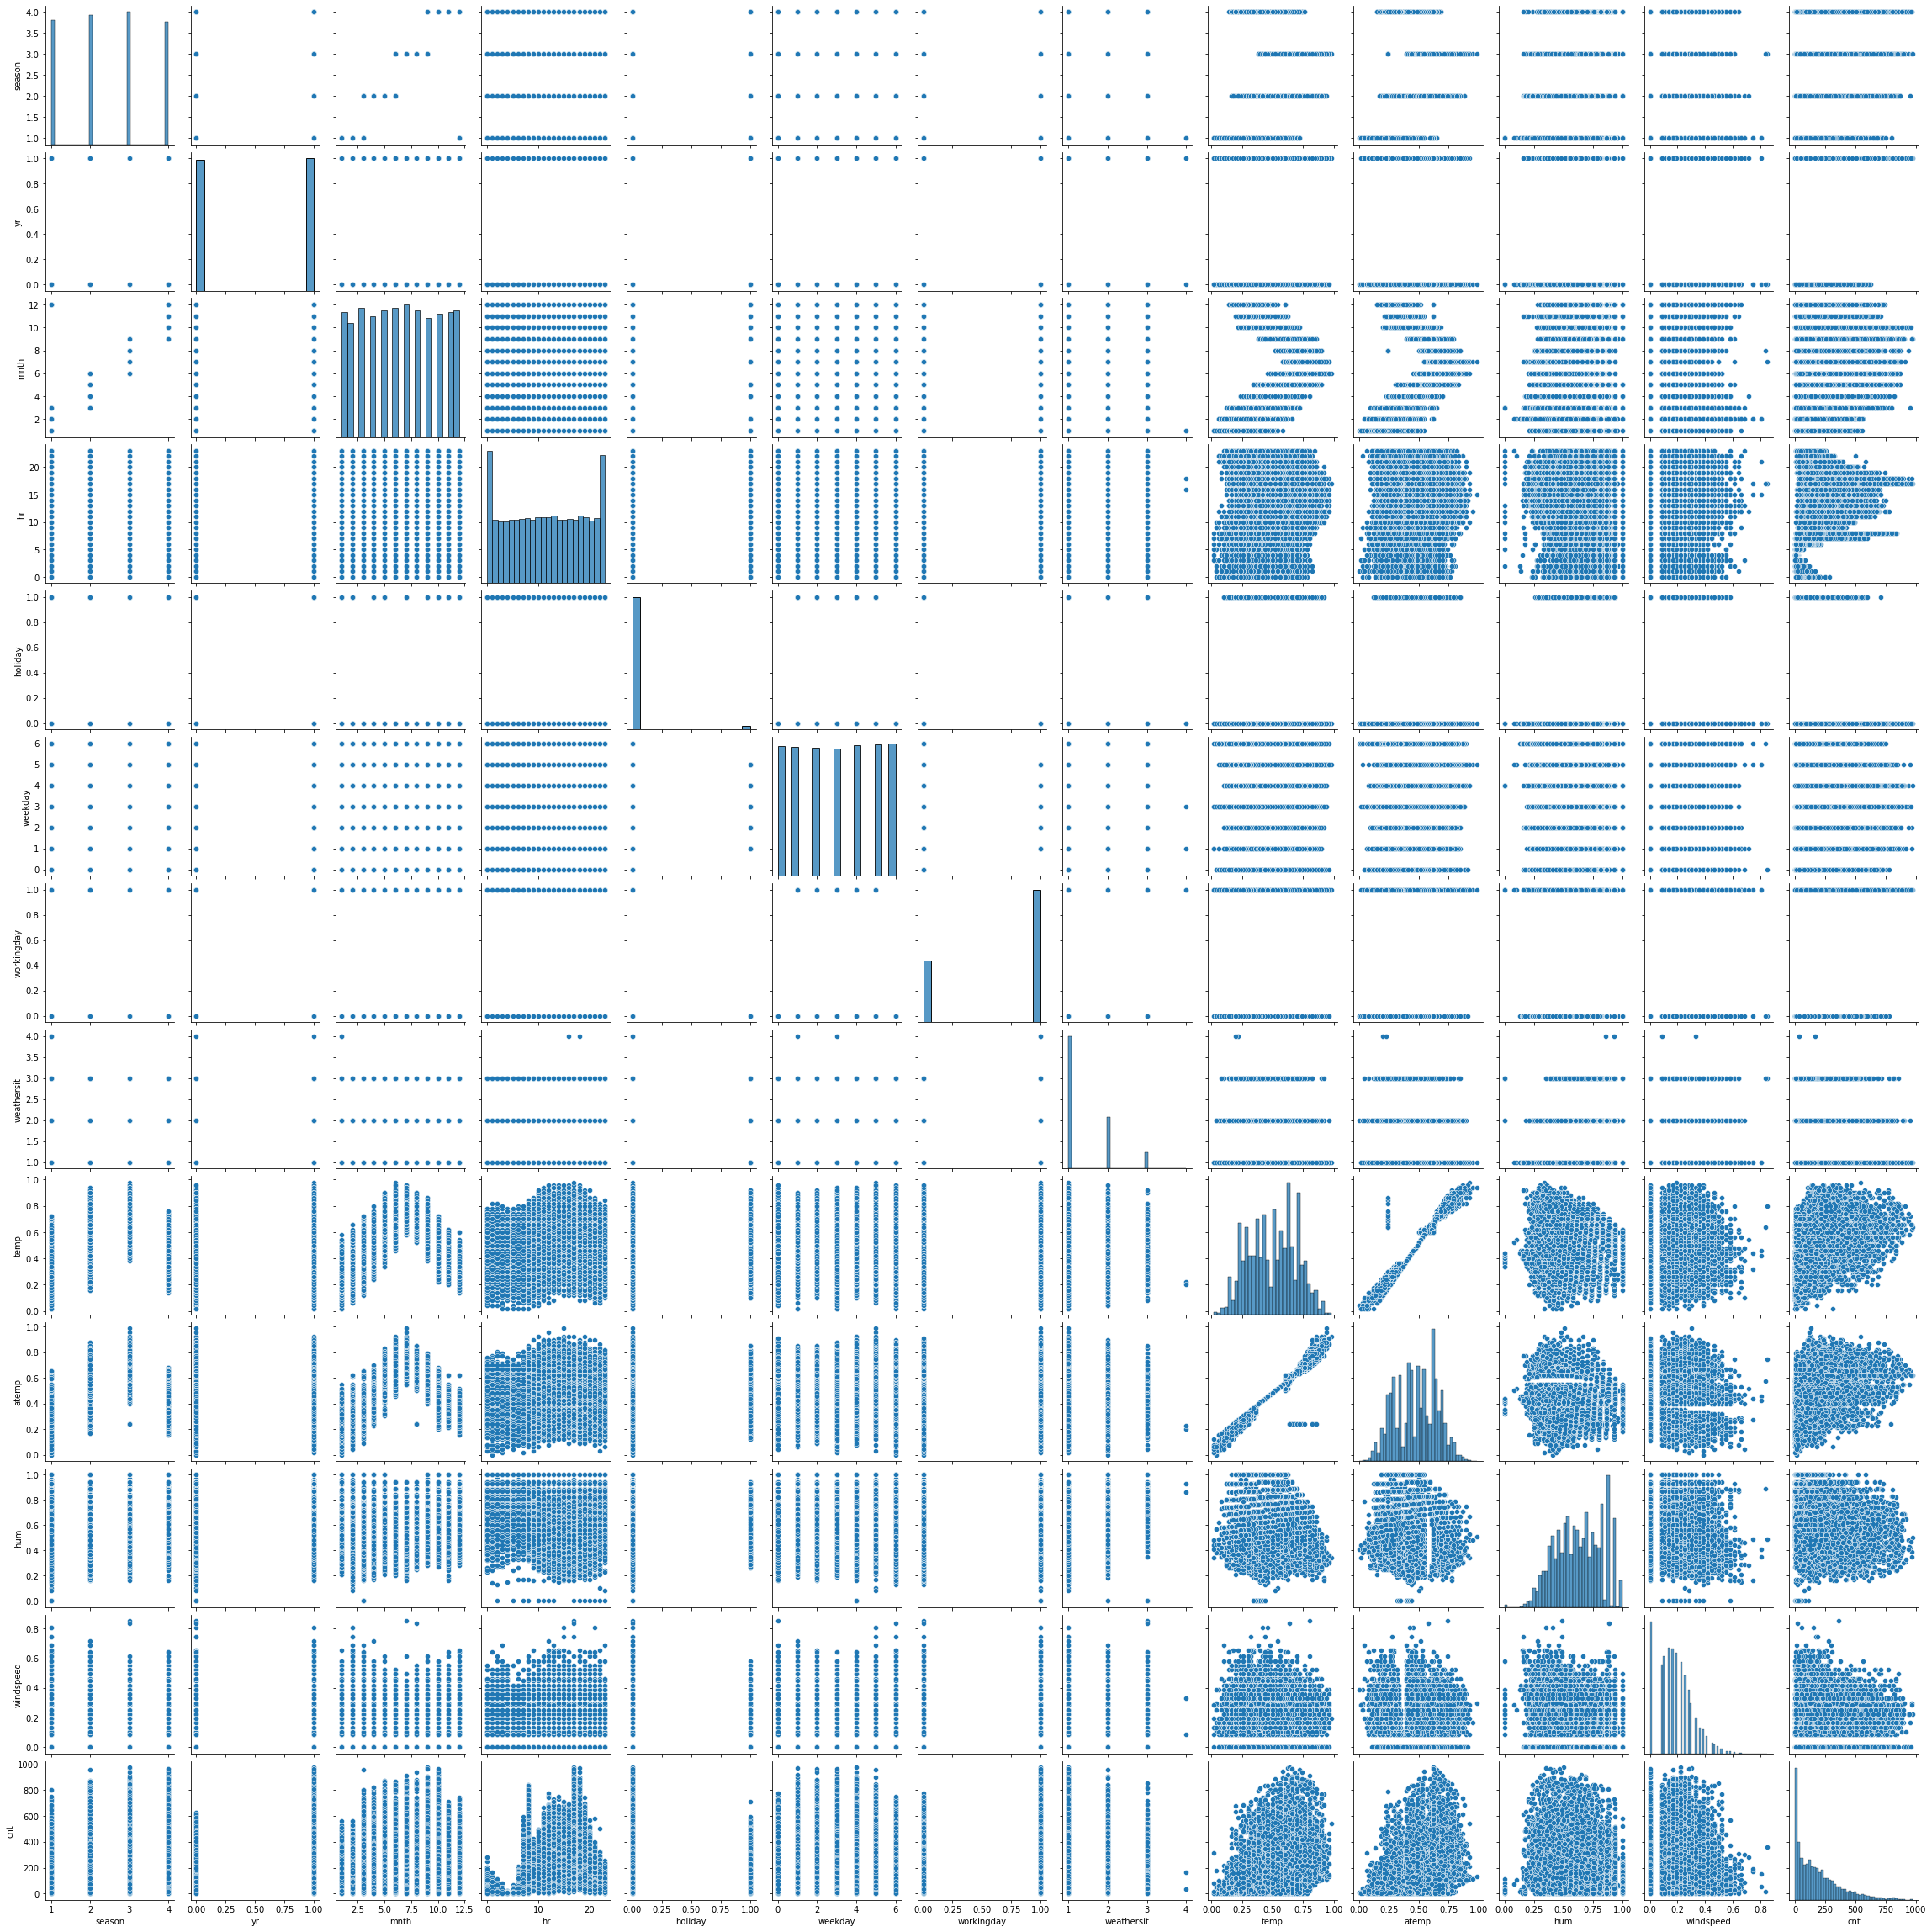

In [69]:
sns.pairplot(df)

In [1]:
plt.figure(figsize=(1,100))
sns.relplot(x="mnth",y="mnth",data=df)

NameError: name 'plt' is not defined

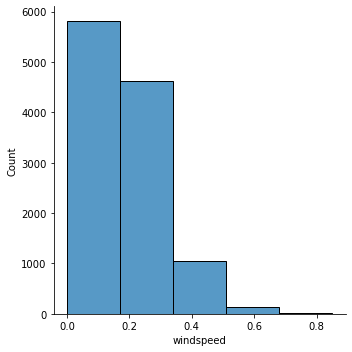

In [71]:
sns.displot(df["windspeed"],bins=5)

In [72]:
df.dropna()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
4,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11629,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,214
11630,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,164
11631,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,122
11632,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11634 entries, 0 to 11633
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      11634 non-null  int64  
 1   yr          11634 non-null  int64  
 2   mnth        11634 non-null  int64  
 3   hr          11634 non-null  int64  
 4   holiday     11634 non-null  int64  
 5   weekday     11634 non-null  int64  
 6   workingday  11634 non-null  int64  
 7   weathersit  11634 non-null  int64  
 8   temp        11634 non-null  float64
 9   atemp       11634 non-null  float64
 10  hum         11634 non-null  float64
 11  windspeed   11634 non-null  float64
 12  cnt         11634 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.2 MB


In [74]:
x= df.drop(columns=["cnt"],axis=1)
y= df["cnt"]

In [75]:
x.shape,y.shape

((11634, 12), (11634,))

# Linear regression

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [77]:
x_train.shape,y_train.shape

((8725, 12), (8725,))

In [78]:
x_test.shape,y_test.shape

((2909, 12), (2909,))

In [79]:
#Creating model and fitting data
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [80]:
#prediction on test data

predict_test_data =  model.predict(x_test)

predict_test_data


array([239.07785936, 312.8498127 , 185.97710288, ..., 155.79791893,
       114.37334696, 417.90170067])

In [81]:
print("accuracy socre",r2_score(y_test,predict_test_data))

accuracy socre 0.40097482954632513


In [82]:
print("intercept",model.intercept_)

print("coef",model.coef_)

intercept -27.95089715475632
coef [  17.90364323   84.13343564    0.72418867    7.76584496  -28.42839204
    1.71933924    2.7062446    -1.79892027   69.66445556  238.28954174
 -196.6800287    48.97165655]


In [83]:
#prediction on train data

predict_train_data = model.predict(x_train)
predict_train_data



array([301.31129655, -15.72759374, 144.09661603, ..., 162.28064088,
       273.68591456,  26.29947477])

In [84]:
print("accuracy socre train data",r2_score(y_train,predict_train_data))

accuracy socre train data 0.3898350747933439


Text(0, 0.5, 'predicted y')

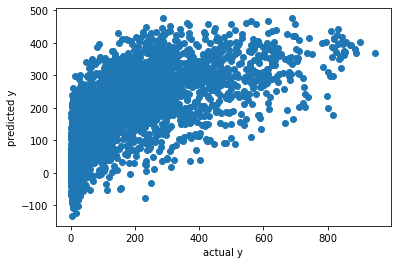

In [85]:
plt.scatter(y_test,predict_test_data)
plt.xlabel("actual y")
plt.ylabel("predicted y")

# KNN regressor model

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [88]:
model =KNeighborsRegressor(n_neighbors=1)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [89]:
predict_test = model.predict(x_test)

print("accuracy score",r2_score(y_test,predict_test))

accuracy score 0.8110429432843254


In [90]:
predict_train = model.predict(x_train)

print("accuracy score",r2_score(y_train,predict_train))

accuracy score 0.9999916890325784


In [91]:
#finding k value
k_list =list(range(1,21))

score_test = []
score_train = []

for i in k_list:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    
    predict_test = model.predict(x_test)
    predict_train = model.predict(x_train)
    
    acc_score_test = r2_score(y_test,predict_test)
    
    
    acc_score_train = r2_score(y_train,predict_train)
    
    score_test.append(acc_score_test)
    
    score_train.append(acc_score_train)
    


In [92]:
score_test,score_train

([0.8110429432843254,
  0.865501709146366,
  0.8861974520551943,
  0.8902770828838612,
  0.8909522520516101,
  0.8913092257124453,
  0.8923719208354476,
  0.8910718340439328,
  0.8895017227287866,
  0.8877555514907914,
  0.8862293094769967,
  0.8847558195690579,
  0.8833848550028881,
  0.8820993191847352,
  0.879289688687968,
  0.8762594251926401,
  0.8736763051389893,
  0.8717876438179842,
  0.8701479166689937,
  0.867859457514701],
 [0.9999916890325784,
  0.9487723512101477,
  0.9384905062667683,
  0.933496870972028,
  0.9293443787941009,
  0.9243655577209068,
  0.9196756942150435,
  0.9164113789186786,
  0.912973330569286,
  0.908882130954958,
  0.9052752663670961,
  0.9016623358503365,
  0.8978649647221079,
  0.894808320211389,
  0.8913426840925073,
  0.8884057155492349,
  0.8853953556533839,
  0.8832664521635939,
  0.8805914986045889,
  0.8775513433365183])

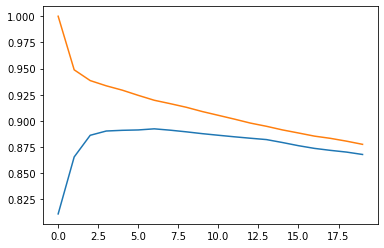

In [93]:
plt.plot(score_test)
plt.plot(score_train)
plt.show()

In [94]:
# for k=5
model =KNeighborsRegressor(n_neighbors=5)
model.fit(x_train,y_train)

predict_test = model.predict(x_test)

print("accuracy_score",r2_score(y_test,predict_test))

accuracy_score 0.8909522520516101


In [95]:
# for k=17

model =KNeighborsRegressor(n_neighbors=17)
model.fit(x_train,y_train)

predict_test = model.predict(x_test)

print("accuracy_score",r2_score(y_test,predict_test))

accuracy_score 0.8736763051389893


In [96]:
# for k=7

model =KNeighborsRegressor(n_neighbors=7)
model.fit(x_train,y_train)

predict_test = model.predict(x_test)

print("accuracy_score",r2_score(y_test,predict_test))

accuracy_score 0.8923719208354476


In [97]:
#knn regressor accuracy = 0.8923719208354476 (k=7) & linear regressor accuracy =0.40097482954632513